In [1]:
import numpy as np
import pandas as pd
import math
import time
import re
import os
from tkinter import filedialog
from tkinter import *
from scipy.io import wavfile
from skimage import util
from scipy import signal
from scipy import stats

from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.decomposition import PCA

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Create data frame of slices created from annotated USV calls

In [3]:
slices_path = 'C:/Users/Schindler/Documents/ProgrammingFun/Scripts/iPythonScripts/USV_python/600_annot_slices.csv'

In [4]:
data = pd.read_csv(slices_path)
annot_slices = pd.DataFrame(data = data)
annot_slices.set_index('Unnamed: 0', inplace=True)
print(annot_slices.shape)
annot_slices.head()

(552, 14135)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,13885,13886,13887,13888,13889,13890,13891,13892,13893,13894,13895,13896,13897,13898,13899,13900,13901,13902,13903,13904,13905,13906,13907,13908,13909,13910,13911,13912,13913,13914,13915,13916,13917,13918,13919,13920,13921,13922,13923,13924,13925,13926,13927,13928,13929,13930,13931,13932,13933,13934,13935,13936,13937,13938,13939,13940,13941,13942,13943,13944,13945,13946,13947,13948,13949,13950,13951,13952,13953,13954,13955,13956,13957,13958,13959,13960,13961,13962,13963,13964,13965,13966,13967,13968,13969,13970,13971,13972,13973,13974,13975,13976,13977,13978,13979,13980,13981,13982,13983,13984,13985,13986,13987,13988,13989,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999,14000,14001,14002,14003,14004,14005,14006,14007,14008,14009,14010,14011,14012,14013,14014,14015,14016,14017,14018,14019,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029,14030,14031,14032,14033,14034,14035,14036,14037,14038,14039,14040,14041,14042,14043,14044,14045,14046,14047,14048,14049,14050,14051,14052,14053,14054,14055,14056,14057,14058,14059,14060,14061,14062,14063,14064,14065,14066,14067,14068,14069,14070,14071,14072,14073,14074,14075,14076,14077,14078,14079,14080,14081,14082,14083,14084,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094,14095,14096,14097,14098,14099,14100,14101,14102,14103,14104,14105,14106,14107,14108,14109,14110,14111,14112,14113,14114,14115,14116,14117,14118,14119,14120,14121,14122,14123,14124,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
376560.0,0.057574,0.276893,0.528347,0.292352,0.967029,0.870557,0.288755,0.079022,1.101868,0.462441,0.176460,0.290753,0.004947,0.150546,0.112863,0.213257,0.000351,0.250368,0.040625,0.013233,0.051501,0.104624,0.025235,0.054788,0.119092,0.165514,0.152776,0.079525,0.115091,0.822810,0.015779,0.640634,0.032834,0.000952,0.001697,1.128441,3.454998,6.057491,7.924726,13.285921,5.151928,1.734595,0.518864,8.810005,19.214619,1.873477,2.051230,0.490528,1.779197,9.304558,0.591761,0.333116,0.155409,0.010680,0.271835,0.300934,0.479206,0.805258,0.540935,1.280548,1.510695,0.391081,0.211721,1.788441,0.666915,0.322421,0.502394,0.129647,0.242350,0.211081,0.401470,0.041769,0.417392,0.042055,0.123541,0.194627,0.149348,0.014053,0.113257,0.225410,0.609203,0.113669,0.090100,0.097159,1.450407,0.207039,1.049344,0.423503,0.007562,0.115557,1.863201,7.091900,12.396386,15.335124,24.513714,16.241535,10.746125,8.842016,20.013206,32.668533,3.471476,3.186846,2.090727,5.559430,14.945801,3.202554,0.588295,0.403289,0.694819,0.391555,0.757407,0.358461,0.358109,0.401354,0.202895,0.952039,0.075327,0.257725,0.969577,0.2

Create new data frame of computed feature values

In [5]:
feature_df = pd.DataFrame(index = annot_slices.index, columns = ['time_stamp', 'spec_flat', 'power_sum'], dtype=float)

for index, row in annot_slices.iterrows():

    feature_df.loc[index]['time_stamp'] = index
    #spectral flattness
    feature_df.loc[index]['spec_flat'] = stats.gmean(row) / row.mean()
    #power sum
    feature_df.loc[index]['power_sum'] = row.sum()

print(feature_df.shape)
feature_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

(552, 3)


,time_stamp,spec_flat,power_sum
Unnamed: 0,,,
376560.0,376560.0,0.155727,98748.960555
46305.0,46305.0,0.368722,32714.903093
243270.0,243270.0,0.232295,63014.446725
149692.5,149692.5,0.306856,43037.465935
243157.5,243157.5,0.062226,270193.532269


Create data frame of annotation info

In [6]:
annot_path = "C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/USV/annot_info_df.xlsx"
data = pd.read_excel(annot_path)
annot_info = pd.DataFrame(data = data)
annot_info.set_index('time_stamp', inplace=True)
print(annot_info.shape)
annot_info.head()

(552, 5)


,Begin Time (s),Annotation,Animal,Group,Begin Time (s)_1000
time_stamp,,,,,
376560.0,376.574455,low slug,533,5,376574.45450
46305.0,46.306579,low slug,533,5,46306.57941
243270.0,243.272865,low slug,533,5,243272.86510
149692.5,149.708324,low slug,533,5,149708.32400
243157.5,243.176192,low slug,533,5,243176.19170


In [7]:
#find indexes with null values
feature_df_null = feature_df[feature_df['spec_flat'].isnull()]
print(feature_df_null.shape)

#drop indexes with null values from annot_slices data frame
nul_values = feature_df_null.index.values.tolist()
print(nul_values)
annot_slices.drop(index = nul_values, inplace=True)

#drop rows with null values from feature_df
print(feature_df.shape)
feature_df = feature_df[feature_df['spec_flat'].notnull()]

#drop indexes with null values from annot_info data frame
annot_info.drop(index = nul_values, inplace=True)

#confirm feature_df and annot_slices now have same row dim
print(annot_slices.shape)
print(feature_df.shape)
print(annot_info.shape)

(6, 3)
[353745.0, 323482.5, 261945.0, 353745.0, 323482.5, 261945.0]
(552, 3)
(546, 14135)
(546, 3)
(546, 5)


In [8]:
features_with_info = pd.concat([annot_info, feature_df], axis=1)
print(features_with_info.shape)
#features_with_info.dropna(axis = 0, inplace=True)
features_with_info.head(10)

(546, 8)


,Begin Time (s),Annotation,Animal,Group,Begin Time (s)_1000,time_stamp,spec_flat,power_sum
376560.0,376.574455,low slug,533,5,376574.45450,376560.0,0.155727,98748.960555
46305.0,46.306579,low slug,533,5,46306.57941,46305.0,0.368722,32714.903093
243270.0,243.272865,low slug,533,5,243272.86510,243270.0,0.232295,63014.446725
149692.5,149.708324,low slug,533,5,149708.32400,149692.5,0.306856,43037.465935
243157.5,243.176192,low slug,533,5,243176.19170,243157.5,0.062226,270193.532269
337747.5,337.761516,low slug,533,5,337761.51600,337747.5,0.082071,239525.503692
326407.5,326.428670,radar,533,5,326428.66990,326407.5,0.124940,113329.788879
328275.0,328.285275,radar,533,5,328285.27500,328275.0,0.128860,141455.771419
329670.0,329.691002,radar,533,5,329691.00220,329670.0,0.215361,67028.666114
314977.5,314.995054,radar,533,5,314995.05400,314977.5,0.091715,174229.853821


In [9]:
features_with_info.groupby('Annotation')['power_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
Annotation,,,,,,,,
bbc,16.0,2.040783e+05,1.933221e+05,65204.579293,118303.708439,157959.000681,179809.255671,8.720126e+05
high multi,5.0,2.495828e+05,2.766522e+05,36262.823360,82139.884439,85348.324129,353085.744318,6.910773e+05
high slug,9.0,2.744756e+05,2.536576e+05,33684.505775,35585.749435,241675.038673,423924.343339,6.687877e+05
low multi,16.0,3.965784e+05,3.698305e+05,45047.931416,175342.738599,243228.849389,552366.113060,1.366219e+06
low slug,60.0,1.042346e+05,1.514156e+05,29249.725489,45506.960588,59882.007608,111231.030926,1.161364e+06
noise,75.0,2.590662e+06,7.979640e+06,36285.484867,82726.628890,263591.988961,860112.283003,4.937721e+07
radar,365.0,1.398070e+05,9.293795e+04,30821.218661,86683.437453,123408.241084,161698.890938,1.145453e+06


In [10]:
features_with_info.groupby('Annotation')['spec_flat'].describe()

,count,mean,std,min,25%,50%,75%,max
Annotation,,,,,,,,
bbc,16.0,0.101816,0.046395,0.026119,0.085418,0.089934,0.118413,0.219365
high multi,5.0,0.178159,0.120824,0.047601,0.077175,0.207964,0.208621,0.349433
high slug,9.0,0.177870,0.146711,0.045738,0.051601,0.082861,0.354162,0.370857
low multi,16.0,0.099359,0.075949,0.027210,0.043118,0.084821,0.105717,0.297074
low slug,60.0,0.221923,0.096959,0.017949,0.135429,0.229621,0.299701,0.405450
noise,75.0,0.125578,0.113946,0.002802,0.030875,0.075092,0.215391,0.380114
radar,365.0,0.138500,0.059485,0.026562,0.098607,0.124074,0.171398,0.383648


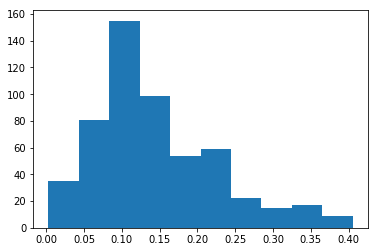

In [11]:
plt.hist(features_with_info['spec_flat'], bins = 10)
plt.show()

In [12]:
features = features_with_info[['spec_flat', 'power_sum']]
features.head()

,spec_flat,power_sum
376560.0,0.155727,98748.960555
46305.0,0.368722,32714.903093
243270.0,0.232295,63014.446725
149692.5,0.306856,43037.465935
243157.5,0.062226,270193.532269


In [ ]:
# center and scale the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled[0:50]

In [ ]:
k_range = range(2,10)
scores = []
for k in k_range:
    print(k)
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(features_scaled)
    scores.append(silhouette_score(features_scaled, km_ss.labels_))
    print(scores)

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [ ]:
km4 = KMeans(n_clusters=4,random_state=1)
km4.fit(features_scaled)
score = silhouette_score(features_scaled, km_ss.labels_)
features_with_info['kmeans_4_scaled'] = [ "cluster_" + str(label) for label in km4.labels_ ]
#summary_ave.groupby('kmeans_2_scaled').mean()
print(score)

In [ ]:
features_with_info.groupby('Annotation')['kmeans_4_scaled'].value_counts()